In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all_more_base_stats import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


('dex_class', {'starting_pts': 58, 'growth_pts': 11})
('str_class', {'starting_pts': 58, 'growth_pts': 12})
('int_class', {'starting_pts': 58, 'growth_pts': 12})


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(str_cl, 3.27)","(str_cl, 17.45)","(int_cl, 8.28)","(str_cl, 15.35)","(int_cl, 22.47)","(int_cl, 18.15)"
1,"(str_cl, 21.06)","(str_cl, 19.6)","(int_cl, 4.29)","(str_cl, 25.1)","(int_cl, 8.07)","(int_cl, 30.92)"
2,"(str_cl, 30.7)","(str_cl, 15.38)","(int_cl, 13.25)","(str_cl, 6.44)","(str_cl, 1.52)","(int_cl, 23.94)"
3,"(str_cl, 39.1)","(str_cl, 21.24)","(int_cl, 9.54)","(str_cl, 15.79)","(str_cl, 11.57)","(int_cl, 31.08)"
4,"(str_cl, 23.34)","(str_cl, 21.46)","(int_cl, 0.15)","(str_cl, 20.84)","(int_cl, 1.48)","(int_cl, 9.67)"
5,"(str_cl, 33.41)","(str_cl, 28.59)","(int_cl, 19.15)","(str_cl, 29.61)","(str_cl, 12.34)","(int_cl, 14.89)"
6,"(str_cl, 38.44)","(str_cl, 27.14)","(int_cl, 8.94)","(str_cl, 22.79)","(str_cl, 12.95)","(int_cl, 16.04)"
7,"(str_cl, 24.31)","(str_cl, 26.21)","(int_cl, 2.24)","(str_cl, 32.72)","(str_cl, 9.87)","(dex_cl, 2.45)"
8,"(str_cl, 28.15)","(str_cl, 30.39)","(int_cl, 2.29)","(str_cl, 19.1)","(str_cl, 17.03)","(dex_cl, 7.44)"
9,"(str_cl, 37.14)","(str_cl, 19.15)","(dex_cl, 11.11)","(str_cl, 14.4)","(str_cl, 32.82)","(int_cl, 12.94)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,1,2,2,2,2
top,str_cl,str_cl,dex_cl,str_cl,str_cl,dex_cl
freq,25,30,18,26,26,19


In [5]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,287.26,218.36,186.56,65.72,53.00,39.22
2,222.60,169.60,142.80,71.02,53.00,45.15
3,191.10,131.25,111.28,69.30,51.45,38.48
4,180.60,113.40,103.00,71.40,51.50,40.17
5,146.64,88.40,86.70,70.72,45.76,38.76
6,137.28,89.44,80.80,70.72,45.76,36.36
7,146.26,79.31,78.00,65.92,50.47,37.05
8,130.81,73.13,66.33,74.16,43.26,43.24
9,108.12,73.44,58.88,72.42,42.84,35.28
10,102.00,58.14,50.96,71.40,47.94,28.21


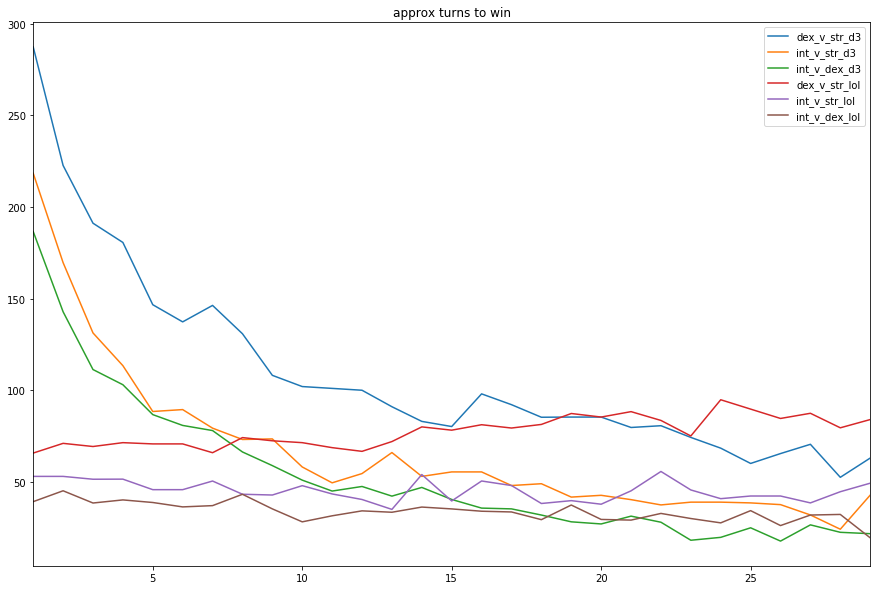

In [6]:

turns_to_win.plot(title='approx turns to win' ,figsize=[15,10])

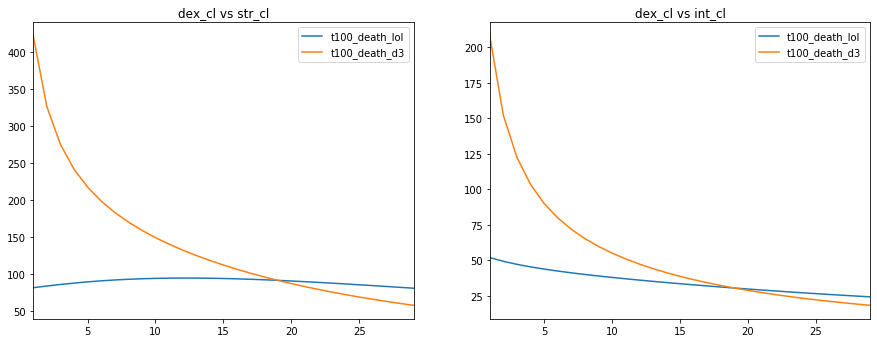

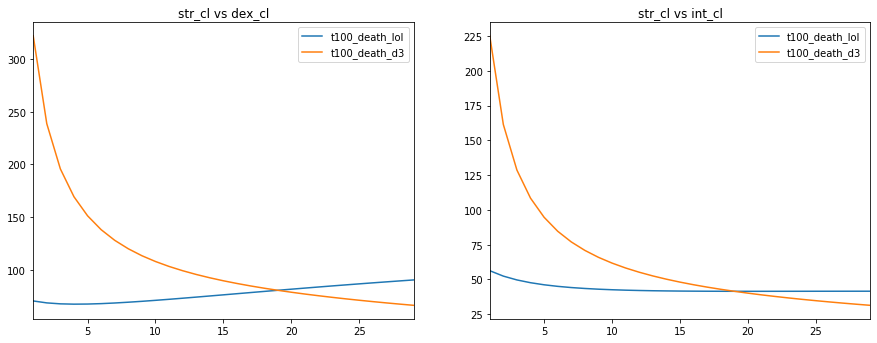

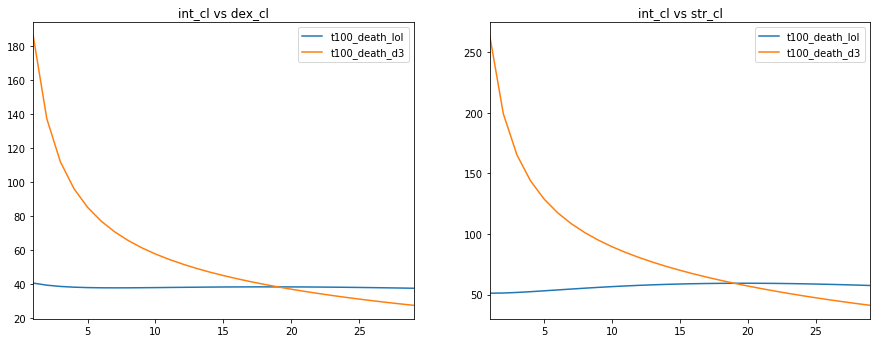

In [7]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

In [8]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,9.70,9.40,9.4,103.09,106.38,106.38
1,9.83,9.45,9.5,101.73,105.82,105.26
2,9.96,9.50,9.6,100.40,105.26,104.17
3,10.09,9.55,9.7,99.11,104.71,103.09
4,10.22,9.60,9.8,97.85,104.17,102.04
5,10.35,9.65,9.9,96.62,103.63,101.01
6,10.48,9.70,10.0,95.42,103.09,100.00
7,10.61,9.75,10.1,94.25,102.56,99.01
8,10.74,9.80,10.2,93.11,102.04,98.04
9,10.87,9.85,10.3,92.00,101.52,97.09


In [9]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,9.510,7.420,7.42,180,150,150,9.75,7.25,7.25
1,10.149,7.635,7.85,190,154,157,10.75,7.75,8.00
2,10.788,7.850,8.28,200,158,164,11.75,8.25,8.75
3,11.427,8.065,8.71,210,162,171,12.75,8.75,9.50
4,12.066,8.280,9.14,220,166,178,13.75,9.25,10.25
5,12.705,8.495,9.57,230,170,185,14.75,9.75,11.00
6,13.344,8.710,10.00,240,174,192,15.75,10.25,11.75
7,13.983,8.925,10.43,250,178,199,16.75,10.75,12.50
8,14.622,9.140,10.86,260,182,206,17.75,11.25,13.25
9,15.261,9.355,11.29,270,186,213,18.75,11.75,14.00


In [10]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'd_dmg_wo_wpn', 'p_dmg_wo_wpn','b_dmg' ,'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,d_dmg_wo_wpn_dex,d_dmg_wo_wpn_str,d_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,b_dmg_dex,b_dmg_str,b_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,4.2,4.2,20.4,13.2,6.2,6.2,7.6,11.1,3.4,30.08,28.78,49.723,31.45,28.03,48.44
1,5.7,5.7,25.5,15.9,7.5,8.2,8.9,14.5,4.7,34.53,34.95,59.903,37.23,34.41,59.50
2,7.2,7.2,30.6,18.6,8.8,10.2,10.2,17.9,6.0,38.99,41.12,70.083,43.40,40.93,71.05
3,8.7,8.7,35.7,21.3,10.1,12.2,11.5,21.3,7.3,43.44,47.29,80.273,49.98,47.61,83.12
4,10.2,10.2,40.8,24.0,11.4,14.2,12.8,24.7,8.6,47.90,53.46,90.453,57.03,54.45,95.73
5,11.7,11.7,45.9,26.7,12.7,16.2,14.1,28.1,9.9,52.35,59.63,100.633,64.57,61.47,108.94
6,13.2,13.2,51.0,29.4,14.0,18.2,15.4,31.5,11.2,56.81,65.80,110.813,72.66,68.67,122.79
7,14.7,14.7,56.1,32.1,15.3,20.2,16.7,34.9,12.5,61.26,71.97,120.993,81.33,76.06,137.33
8,16.2,16.2,61.2,34.8,16.6,22.2,18.0,38.3,13.8,65.72,78.14,131.183,90.63,83.64,152.60
9,17.7,17.7,66.3,37.5,17.9,24.2,19.3,41.7,15.1,70.18,84.32,141.363,100.60,91.45,168.63


In [11]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,15.23,16.25,49.723,20.84,28.78,15.783,31.45,28.03,48.44
1,17.70,18.98,59.903,22.98,34.95,18.373,37.23,34.41,59.50
2,20.18,21.70,70.083,25.13,41.12,20.973,43.40,40.93,71.05
3,22.65,24.42,80.273,27.27,47.29,23.563,49.98,47.61,83.12
4,25.13,27.14,90.453,29.42,53.46,26.163,57.03,54.45,95.73
5,27.60,29.87,100.633,31.56,59.63,28.763,64.57,61.47,108.94
6,30.08,32.59,110.813,33.71,65.80,31.353,72.66,68.67,122.79
7,32.56,35.31,120.993,35.85,71.97,33.953,81.33,76.06,137.33
8,35.03,38.03,131.183,38.00,78.14,36.543,90.63,83.64,152.60
9,37.50,40.76,141.363,40.14,84.32,39.143,100.60,91.45,168.63


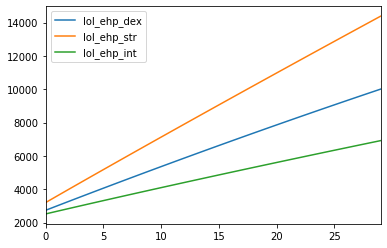

In [12]:
compare(all_cl_df, ['lol_ehp',]).plot()

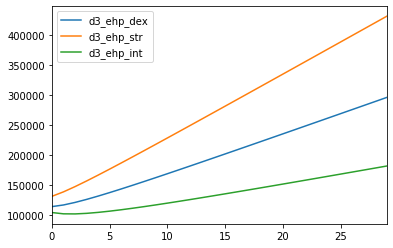

In [13]:
compare(all_cl_df, ['d3_ehp',]).plot()

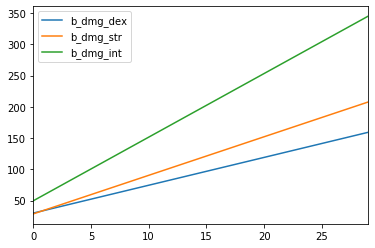

In [14]:
compare(all_cl_df, ['b_dmg',]).plot()

In [15]:
cl_df_l_copy = cl_df_list.copy()

In [16]:
cl_df_l_copy[1]

,lvl,vit,dex,str,int,b_speed,toughness,u_name,speed,ticks_to_turn,...,armor,dodge,d3_res_reduction,d3_res_dmg_taken,dmg_multi_lol,lol_dmg_taken,lol_dmg_redu_dodge,d3_dmg_redu_dodge,lol_ehp,d3_ehp
0,1,14,8,15,4,8,9,str_cl,9.40,106.38,...,68,7.420,93.150685,1.919863,0.595238,16.684524,15.446532,1.777409,3204.522619,130730.166781
1,2,17,9,19,5,9,11,str_cl,9.45,105.82,...,86,7.635,89.583333,3.584375,0.537634,18.500000,17.087525,3.310708,3602.883543,138175.544833
2,3,20,10,23,6,10,13,str_cl,9.50,105.26,...,104,7.850,87.394958,5.159244,0.490196,20.063725,18.488723,4.754243,3999.494951,146925.573382
3,4,23,11,27,7,11,15,str_cl,9.55,104.71,...,122,8.065,85.915493,6.705634,0.450450,21.445946,19.716330,6.164824,4394.641198,156346.020465
4,5,26,12,31,8,12,17,str_cl,9.60,104.17,...,140,8.280,84.848485,8.250000,0.416667,22.687500,20.808975,7.566900,4788.521333,166156.286485
5,6,29,13,35,9,13,19,str_cl,9.65,103.63,...,158,8.495,84.042553,9.809043,0.387597,23.825581,21.801598,8.975764,5181.278857,176213.086543
6,7,32,14,39,10,14,21,str_cl,9.70,103.09,...,176,8.710,83.412322,11.390758,0.362319,24.880435,22.713349,10.398623,5573.019833,186435.610671
7,8,35,15,43,11,15,23,str_cl,9.75,102.56,...,194,8.925,82.905983,13.001709,0.340136,25.870748,23.561784,11.841307,5963.824354,196774.820342
8,9,38,16,47,12,16,25,str_cl,9.80,102.04,...,212,9.140,82.490272,14.645136,0.320513,26.807692,24.357469,13.306571,6353.754026,207199.231677
9,10,41,17,51,13,17,27,str_cl,9.85,101.52,...,230,9.355,82.142857,16.330357,0.303030,27.712121,25.119652,14.802652,6742.857015,217687.705500
